In [ ]:
!pip install -e .. 

In [1]:
# Import standard libraries
import os
import sys

# Third-Party Libraries
import numpy as np

# Import the Swarm Systems Lab Simulator
import ssl_simulator
from ssl_simulator.data_manager import load_sim

# Import custom functions and classes
from visualization import PlotBasic

# Define constants for file paths
OUTPUT_DIR = os.path.join("..", "output")
SIMDATA_FILE = os.path.join(OUTPUT_DIR, "data.csv")

In [6]:
# dir(ssl_simulator)

# Single integrator simulation

In [2]:
# Define the initial state
N = 5

p = np.array([np.random.random(N), np.random.random(N)]).T

x0 = [p]

# Controller settings
k = np.array([1,1])

# --------------------------------
# Select and initialize the robot model and the controller
robot_model = ssl_simulator.robot_models.SingleIntegrator(x0)
controller = ssl_simulator.controllers.ConstantSignal(k)

# Then, construct the Simulator Engine
dt = 0.01
simulator = ssl_simulator.SimulationEngine(robot_model, controller, time_step=dt)

# --------------------------------
# Run the simulation and save data
tf = 1
simulator.run(tf)
simulator.logger.save(SIMDATA_FILE)
# --------------------------------

Running simulation: 100%|██████████| 100/100 [00:00<00:00, 35281.83it/s]


time:  (101,)
p:  (101, 5, 2)
p_dot:  (101, 5, 2)
u:  (101, 1, 2)
k:  (101, 1, 2)


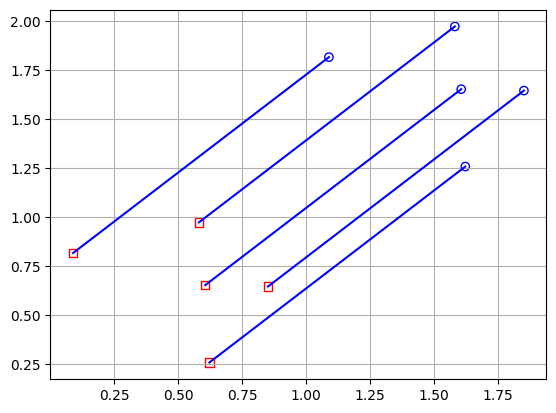

In [3]:
# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE, debug=True)

# Initialize the plotter with the loaded simulation data
plotter = PlotBasic(simulation_data)

# Generate and display the plot
plotter.plot()

# 2D Unicycle simulation

In [6]:
# Define the initial state
N = 5

p = np.array([np.random.random(N), np.random.random(N)]).T
speed = np.ones(N)
theta = np.random.random(N) * np.pi


x0 = [p, speed, theta]

# --------------------------------
# Select and initialize the robot model and the controller
robot_model = ssl_simulator.robot_models.Unicycle2D(x0)
controller = ssl_simulator.controllers.ConstantSignal(np.pi/4)

# Then, construct the Simulator Engine
dt = 0.01
simulator = ssl_simulator.SimulationEngine(robot_model, controller, time_step=dt)

# --------------------------------
# Run the simulation and save data
tf = 1
simulator.run(tf)
simulator.logger.save(SIMDATA_FILE)
# --------------------------------

Running simulation: 100%|██████████| 100/100 [00:00<00:00, 22751.85it/s]


time:  (101,)
p:  (101, 5, 2)
speed:  (101, 5)
theta:  (101, 5)
p_dot:  (101, 5, 2)
speed_dot:  (101, 5)
theta_dot:  (101, 5)
u:  (101, 1)
k:  (101, 1)


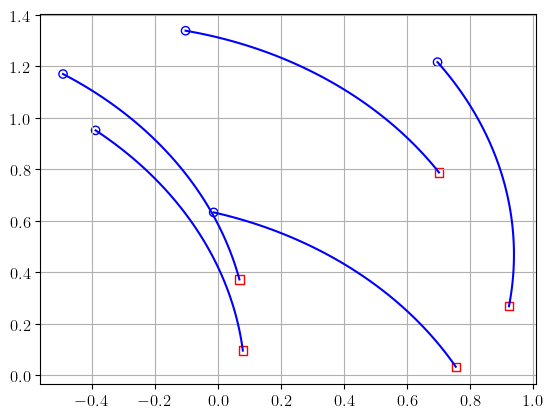

In [7]:
# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE, debug=True)

# Initialize the plotter with the loaded simulation data
plotter = PlotBasic(simulation_data)

# Generate and display the plot
plotter.plot()